In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vishal.kuma

In [49]:
income_data = pd.read_csv('train.csv')

In [50]:
income_data.shape

(9557, 143)

In [51]:
income_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


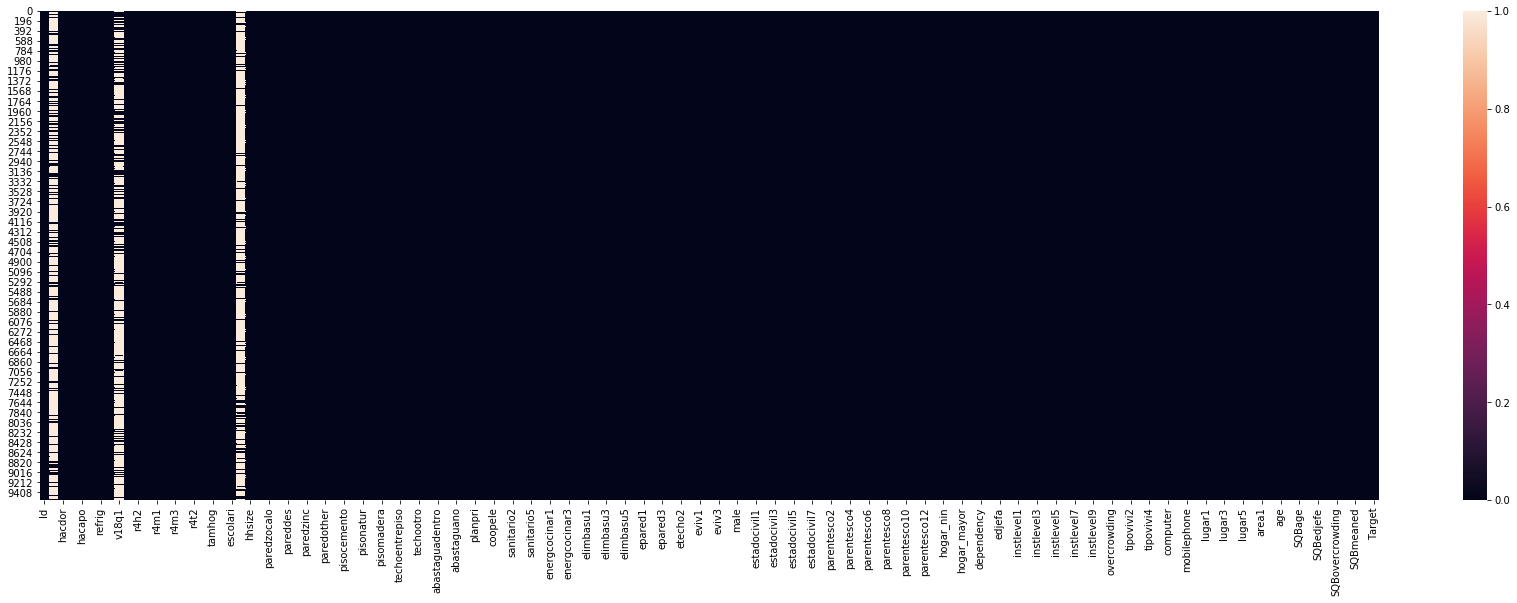

In [52]:
plt.figure(figsize=(30,9))
sns.heatmap(income_data.isnull())
plt.show()

In [63]:
Total_null_values=income_data.isnull().sum().sort_values(ascending=False)
Percentage=(income_data.isnull().sum()/income_data.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([Total_null_values,Percentage],axis=1, keys=['Total_null_values','Percentage'] )
missing_data.head(20)


,Total_null_values,Percentage
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
meaneduc,5,0.000523
SQBmeaned,5,0.000523
techozinc,0,0.000000
techoentrepiso,0,0.000000
techocane,0,0.000000
techootro,0,0.000000
cielorazo,0,0.000000


As we can see from the above table that rez_esc,v18q1,v2a1 have more than 70% data missing. We will delete those rows.


In [64]:
df1 = missing_data.copy()

In [68]:
df2=income_data.drop(missing_data[missing_data['Percentage'] >= 0.7].index,1)

In [69]:
df2.shape

(9557, 140)

In [71]:
df2['meaneduc'].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [72]:
df2['SQBmeaned'].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

In [74]:
df2.fillna(value=df2.mean(),inplace=True)

In [78]:
df2.shape

(9557, 140)

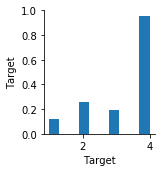

In [96]:
import seaborn as sns
sns.pairplot(df2[['Target']])

In [87]:
X = df2.iloc[:,3:139]
y = df2.iloc[:,-1]

In [99]:
df2[df2['Id']=='ID_279628684'] 

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.2+ MB


In [110]:
object_data_column=df2.select_dtypes(include=['object'])
object_data_column.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


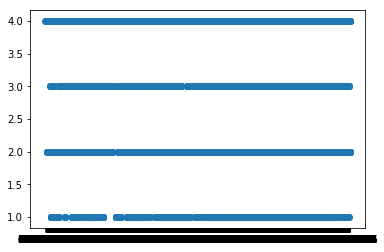

In [112]:
plt.scatter(df2['idhogar'],df2['Target'])
plt.show()

In [115]:
object_data_column['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
3.5            18
.80000001      18
1.25           18
2.25           13
.71428573      12
1.2            11
.22222222      11
1.75           11
.83333331      11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [119]:
sns.pairplot(object_data_column)

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selectfeatures = SelectKBest(score_func=chi2,k=20)
selectfeatures.fit(X,y)
#best_features = fit.scores_


ValueError: could not convert string to float: '21eb7fcc1'

In [91]:
df2[(df2 == '21eb7fcc1').any(1)].stack()

0  Id                 ID_279628684
   hacdor                        0
   rooms                         3
   hacapo                        0
   v14a                          1
   refrig                        1
   v18q                          0
   r4h1                          0
   r4h2                          1
   r4h3                          1
   r4m1                          0
   r4m2                          0
   r4m3                          0
   r4t1                          0
   r4t2                          1
   r4t3                          1
   tamhog                        1
   tamviv                        1
   escolari                     10
   hhsize                        1
   paredblolad                   1
   paredzocalo                   0
   paredpreb                     0
   pareddes                      0
   paredmad                      0
   paredzinc                     0
   paredfibras                   0
   paredother                    0
   pisomoscer       